In [6]:
from PIL import Image

img = Image.open("../Baigneurs_a_Asnieres.jpg")

In [10]:
import numpy as np
img_array = np.array(img)

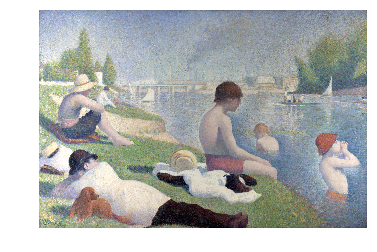

In [15]:
import matplotlib.pyplot as plt

plt.imshow(img_array)
plt.axis("off")
plt.show()

In [16]:
img_array.shape

(4226, 6367, 3)

In [18]:
max_1 = np.max(img_array[:,:,0])
print(max_1)

255


In [49]:
from torchvision import datasets 
import torch
from torch.utils.data import Dataset, DataLoader

In [57]:
input_size = 5
output_size = 2

batch_size = 30
data_size = 100

In [58]:
# define dataset instance and using dataloader to load data parallely
class RandomDataset(Dataset):

    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)

    def __getitem__(self, index):
        return self.data[index]

    def __len__(self):
        return self.len

rand_loader = DataLoader(dataset=RandomDataset(input_size, data_size),
                         batch_size=batch_size, shuffle=True)

In [70]:
data = list(rand_loader)
data = [i.numpy() for i in data]
data = np.array(data[0:3]) # python slice: 留头不留尾
print(data.shape)

(3, 30, 5)


In [54]:
# 先wrap再送到GPU device
import torch.nn as nn

class Mode(nn.Module):
    def __init__(self):
        super(Mode, self).__init__()
    
mode = Mode()
mode = nn.DataParallel(mode)

In [47]:
device = torch.device("cpu")
mode.to(device) # some devices

DataParallel(
  (module): Mode()
)

In [55]:
help(mode.train)

Help on method train in module torch.nn.modules.module:

train(mode=True) method of torch.nn.parallel.data_parallel.DataParallel instance
    Sets the module in training mode.
    
    This has any effect only on certain modules. See documentations of
    particular modules for details of their behaviors in training/evaluation
    mode, if they are affected, e.g. :class:`Dropout`, :class:`BatchNorm`,
    etc.
    
    Returns:
        Module: self



In [82]:
a=torch.rand(2)
b=torch.rand(2, requires_grad=True)
c = a+b
c.requires_grad
c = torch.mean(c)
c.backward()
c.backward()

In [83]:
import tensorflow as tf

In [85]:
r"\n" #拆分意义

'\\n'

In [95]:
help(torch.nn.parallel.data_parallel)

Help on function data_parallel in module torch.nn.parallel.data_parallel:

data_parallel(module, inputs, device_ids=None, output_device=None, dim=0, module_kwargs=None)
    Evaluates module(input) in parallel across the GPUs given in device_ids.
    
    This is the functional version of the DataParallel module.
    
    Args:
        module (Module): the module to evaluate in parallel
        inputs (tensor): inputs to the module
        device_ids (list of int or torch.device): GPU ids on which to replicate module
        output_device (list of int or torch.device): GPU location of the output  Use -1 to indicate the CPU.
            (default: device_ids[0])
    Returns:
        a Tensor containing the result of module(input) located on
        output_device



In [101]:
torch.Tensor(np.ones(1)).type

<function Tensor.type>

In [2]:
import torch.nn as nn
import torch
inputs = torch.arange(1, 5, dtype=torch.float32).view(1, 1, 2, 2)

In [3]:
inputs

tensor([[[[1., 2.],
          [3., 4.]]]])

In [9]:
nn.functional.interpolate(inputs, scale_factor=2, mode='nearest')

tensor([[[[1., 1., 2., 2.],
          [1., 1., 2., 2.],
          [3., 3., 4., 4.],
          [3., 3., 4., 4.]]]])

In [16]:
nn.functional.interpolate(inputs, scale_factor=2, mode='bilinear')

/Users/ellise/anaconda2/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:2423: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


tensor([[[[1.0000, 1.2500, 1.7500, 2.0000],
          [1.5000, 1.7500, 2.2500, 2.5000],
          [2.5000, 2.7500, 3.2500, 3.5000],
          [3.0000, 3.2500, 3.7500, 4.0000]]]])

In [21]:
nn.UpsamplingNearest2d(scale_factor=3)(inputs)

/Users/ellise/anaconda2/envs/py36/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.UpsamplingNearest2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


tensor([[[[1., 1., 1., 2., 2., 2.],
          [1., 1., 1., 2., 2., 2.],
          [1., 1., 1., 2., 2., 2.],
          [3., 3., 3., 4., 4., 4.],
          [3., 3., 3., 4., 4., 4.],
          [3., 3., 3., 4., 4., 4.]]]])

Populating the interactive namespace from numpy and matplotlib


/Users/ellise/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
  0%|          | 0/10000 [00:00<?, ?it/s]

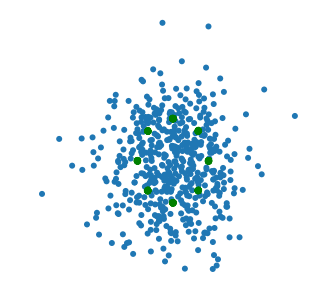

 20%|█▉        | 1996/10000 [00:56<03:34, 37.36it/s]

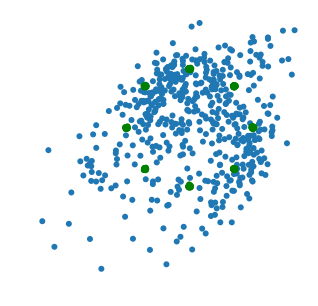

 40%|███▉      | 3996/10000 [01:51<02:45, 36.30it/s]

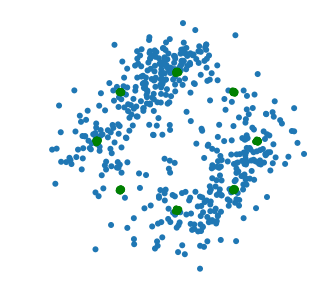

 60%|█████▉    | 5996/10000 [02:47<01:46, 37.54it/s]

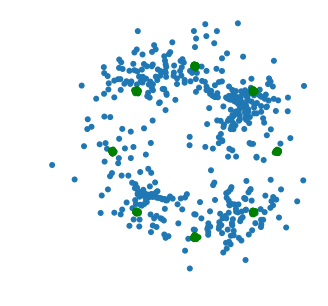

 80%|███████▉  | 7996/10000 [03:44<00:55, 36.25it/s]

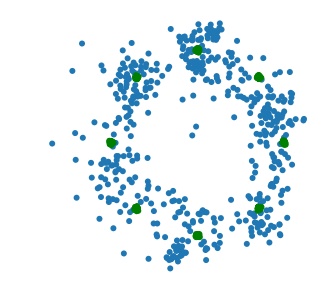

100%|█████████▉| 9993/10000 [04:40<00:00, 37.65it/s]

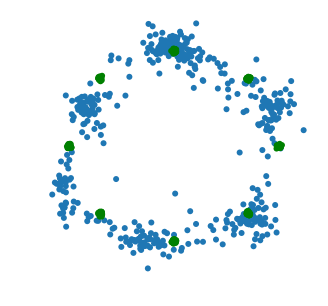

100%|██████████| 10000/10000 [04:43<00:00, 35.32it/s]


In [15]:
%pylab inline
from collections import OrderedDict
import tensorflow as tf
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True' # seems like to allow dupicate lib to exist
ds = tf.contrib.distributions
slim = tf.contrib.slim
        
from keras.optimizers import Adam

try:
    from moviepy.video.io.bindings import mplfig_to_npimage
    import moviepy.editor as mpy
    generate_movie = True
except:
    print("Warning: moviepy not found.")
    generate_movie = False
    
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import KDTree


def knn_distance(point, sample, k):
    """ Euclidean distance from `point` to it's `k`-Nearest
    Neighbour in `sample` """
    norms = np.linalg.norm(sample-point, axis=1)
    return np.sort(norms)[k]


def verify_sample_shapes(s1, s2, k):
    # Expects [N, D]
    assert(len(s1.shape) == len(s2.shape) == 2)
    # Check dimensionality of sample is identical
    assert(s1.shape[1] == s2.shape[1])


def naive_estimator(s1, s2, k=1):
    """ KL-Divergence estimator using brute-force (numpy) k-NN
        s1: (N_1,D) Sample drawn from distribution P
        s2: (N_2,D) Sample drawn from distribution Q
        k: Number of neighbours considered (default 1)
        return: estimated D(P|Q)
    """
    verify_sample_shapes(s1, s2, k)

    n, m = len(s1), len(s2)
    D = np.log(m / (n - 1))
    d = float(s1.shape[1])

    for p1 in s1:
        nu = knn_distance(p1, s2, k-1)  # -1 because 'p1' is not in 's2'
        rho = knn_distance(p1, s1, k)
        D += (d/n)*np.log(nu/rho) # 这是如何计算的
    return D

_graph_replace = tf.contrib.graph_editor.graph_replace

def remove_original_op_attributes(graph):
    """Remove _original_op attribute from all operations in a graph."""
    for op in graph.get_operations():
        op._original_op = None
        
def graph_replace(*args, **kwargs):
    """Monkey patch graph_replace so that it works with TF 1.0"""
    remove_original_op_attributes(tf.get_default_graph())
    return _graph_replace(*args, **kwargs)
  
def extract_update_dict(update_ops):
    """Extract variables and their new values from Assign and AssignAdd ops.
    
    Args:
        update_ops: list of Assign and AssignAdd ops, typically computed using Keras' opt.get_updates()

    Returns:
        dict mapping from variable values to their updated value
    """
    name_to_var = {v.name: v for v in tf.global_variables()}
    updates = OrderedDict()
    for update in update_ops:
        var_name = update.op.inputs[0].name
        var = name_to_var[var_name]
        value = update.op.inputs[1]
        if update.op.type == 'Assign':
            updates[var.value()] = value
        elif update.op.type == 'AssignAdd':
            updates[var.value()] = var + value
        else:
            raise ValueError("Update op type (%s) must be of type Assign or AssignAdd"%update_op.op.type)
    return updates
  
def sample_mog(batch_size, n_mixture=9, std=0.01, radius=1.0):
    thetas = np.linspace(0, 2 * np.pi, n_mixture)
    xs, ys = radius * np.sin(thetas), radius * np.cos(thetas)
    cat = ds.Categorical(tf.zeros(n_mixture))
    comps = [ds.MultivariateNormalDiag([xi, yi], [std, std]) for xi, yi in zip(xs.ravel(), ys.ravel())]
    data = ds.Mixture(cat, comps)
    return data.sample(batch_size)

params = dict(
    batch_size=512,
    disc_learning_rate=1e-4,
    gen_learning_rate=5e-3,
    beta1=0.5,
    epsilon=1e-8,
    max_iter=10000,
    viz_every=2000,
    z_dim=256,
    x_dim=2,
    unrolling_steps=5,
)

tf.reset_default_graph()

def generator(z, output_dim=2, n_hidden=128, n_layer=2, reuse=False):
    with tf.variable_scope("generator", reuse=reuse):
        h = slim.stack(z, slim.fully_connected, [n_hidden] * n_layer, activation_fn=tf.nn.tanh)
        x = slim.fully_connected(h, output_dim, activation_fn=None)
    return x

def discriminator(x, n_hidden=128, n_layer=2, reuse=False):
    with tf.variable_scope("discriminator", reuse=reuse):
        h = slim.stack(x, slim.fully_connected, [n_hidden] * n_layer, activation_fn=tf.nn.tanh)
        log_d = slim.fully_connected(h, 1, activation_fn=None)
    return log_d

def encoder(z, output_dim=256, n_hidden=128, n_layer=2):
    with tf.variable_scope("encoder"):
        h = slim.stack(z, slim.fully_connected, [n_hidden] * n_layer, activation_fn=tf.nn.tanh)
        x = slim.fully_connected(h, output_dim, activation_fn=None)
    return x

data = sample_mog(params['batch_size'])

noise = ds.Normal(tf.zeros(params['z_dim']), 
                  tf.ones(params['z_dim'])).sample(params['batch_size'])
# Construct generator and discriminator nets
with slim.arg_scope([slim.fully_connected], weights_initializer=tf.orthogonal_initializer(gain=1.4)):
    samples = generator(noise, output_dim=params['x_dim'])
    real_score = discriminator(data)
    fake_score = discriminator(samples, reuse=True)

    z_reconst = encoder(data)
    x_reconst = generator(z_reconst, reuse=True)
    
# Saddle objective    
loss = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=real_score, labels=tf.ones_like(real_score)) +
    tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_score, labels=tf.zeros_like(fake_score)))

loss_g = tf.reduce_mean(tf.log(1. - tf.nn.sigmoid(fake_score)))
loss_e = tf.reduce_mean((data - x_reconst)**2)
gen_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "generator")
disc_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "discriminator")
enc_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "encoder")

# Vanilla discriminator update
d_train_opt = tf.train.AdamOptimizer(params['disc_learning_rate'], beta1=params['beta1'], epsilon=params['epsilon'])
d_train_op = d_train_opt.minimize(loss, var_list=disc_vars)


# Optimize the generator on the unrolled loss
g_train_opt = tf.train.AdamOptimizer(params['gen_learning_rate'], beta1=params['beta1'], epsilon=params['epsilon'])
g_train_op = g_train_opt.minimize(loss_g+loss_e, var_list=gen_vars)

# enc opt
e_train_opt = tf.train.AdamOptimizer(params['gen_learning_rate'], beta1=params['beta1'], epsilon=params['epsilon'])
e_train_op = g_train_opt.minimize(loss_e, var_list=enc_vars)

from tqdm import tqdm
if 'sess' in globals():
  sess.close()
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

xmax = 3
fs = []
frames = []
np_samples = []
np_data = []
n_batches_viz = 5
viz_every = params['viz_every']

vanillagan_KL_list = []
vanillagan_RKL_list = []
for i in tqdm(range(params['max_iter'])):
    f, _, _, _ = sess.run([[loss], g_train_op, d_train_op, e_train_op])
    fs.append(f)
    if i % (viz_every-1) == 0:
        np_samples.append(np.vstack([sess.run(samples) for _ in range(n_batches_viz)]))
        np_data.append(np.vstack([sess.run(data) for _ in range(n_batches_viz)]))
        
        vanillagan_KL_list.append(naive_estimator(np_data[-1],np_samples[-1],1))
        vanillagan_RKL_list.append(naive_estimator(np_samples[-1], np_data[-1], 1))
        xx, yy = sess.run([samples, data])
        fig = figure(figsize=(5,5))
        scatter(xx[:, 0], xx[:, 1], edgecolor='none')
        scatter(yy[:, 0], yy[:, 1], c='g', edgecolor='none')
        axis('off')
        if generate_movie:
            frames.append(mplfig_to_npimage(fig))
        show()

(-1.1461809968155838,
 1.14026154033365,
 -1.1467184947372568,
 1.1451585219741953)

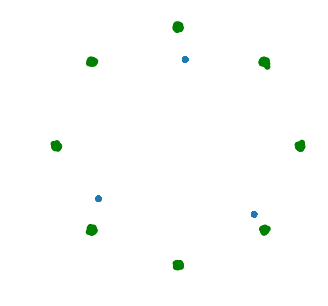

In [16]:
tt = sess.run(x_reconst)
xx, yy = sess.run([samples, data])
fig = figure(figsize=(5,5))
scatter(tt[:, 0], tt[:, 1], edgecolor='none')
scatter(yy[:, 0], yy[:, 1], c='g', edgecolor='none')
axis('off')

In [11]:
noise_reconst = sess.run(z_reconst)
noise_reconst

array([[ 19.078503  , -14.58463   ,  -6.473718  , ...,  -5.342319  ,
         14.813757  ,  -0.34518927],
       [ -6.7394743 ,  18.370632  ,   4.685888  , ...,  -2.7342832 ,
        -10.800928  ,  -5.8199716 ],
       [ 30.028639  ,  -9.419152  ,  -7.449554  , ..., -15.596428  ,
         16.456125  ,  -4.3068056 ],
       ...,
       [ -0.4759807 ,  17.112886  ,   1.3912063 , ...,  -6.54424   ,
         -7.281366  ,  -6.440661  ],
       [ -6.8363    ,  18.364895  ,   4.7048383 , ...,  -2.6688604 ,
        -10.842793  ,  -5.8118067 ],
       [ -6.8950934 ,  18.358383  ,   4.7151704 , ...,  -2.6282477 ,
        -10.868491  ,  -5.8053856 ]], dtype=float32)

In [47]:
# 逐行操作
a = np.arange(9, dtype = np.float_).reshape(3,3) 

print ('First array:' )
print (a )
print ('\n' ) 

print ('Second array:') 
b = np.array([10,10,10]) 
print (b )
print ('\n' ) 

print ('Add the two arrays:') 
print (np.add(a,b) )
print ('\n'  )

print ('Subtract the two arrays:') 
print (np.subtract(a,b) )
print ('\n')  

print ('Multiply the two arrays:') 
print (np.multiply(a,b) )
print ('\n'  )

print ('Divide the two arrays:' )
print (np.divide(a,b))

First array:
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


Second array:
[10 10 10]


Add the two arrays:
[[10. 11. 12.]
 [13. 14. 15.]
 [16. 17. 18.]]


Subtract the two arrays:
[[-10.  -9.  -8.]
 [ -7.  -6.  -5.]
 [ -4.  -3.  -2.]]


Multiply the two arrays:
[[ 0. 10. 20.]
 [30. 40. 50.]
 [60. 70. 80.]]


Divide the two arrays:
[[0.  0.1 0.2]
 [0.3 0.4 0.5]
 [0.6 0.7 0.8]]


In [1]:
import numpy as np
for i in range(10):
    a = np.random.randn(1)
    if a < -2:
        break # if break, then will not execute else
else: print("there is no number less than -2") # break or finished, if finished then...

there is no number less than -2


In [65]:
def do_sth(*arg, **kargs): # **并不是字典，而是一系列任意参数
    print(arg)
    print(kargs)
    
do_sth(120, 178, math=99, english=98)

(120, 178)
{'math': 99, 'english': 98}


In [141]:
y = 0
for i in range(10):
    x = np.random.choice((0,-1,1))
    y += 1 if x <0 else 0
    
print(y) # how many -1 are there for 10 experiments

4


In [129]:
import time
def cal_time(func):
    def inner(*arg, **kargs):
        start = time.time()
        func(*arg, **kargs)
        end = time.time()
        return (end - start)
    
    return inner

@cal_time
def do_sth(*arg, **kargs): 
    print(arg)
    print(kargs)
    
do_sth(120, 178, math=99, english=98)

(120, 178)
{'math': 99, 'english': 98}


0.0001049041748046875

In [128]:
def entry_exit(f):
    def new_f(x):
        print("Entering", f.__name__)
        f(x)
        print("Exited", f.__name__)
    return new_f # return a new function

@entry_exit
def func1(x):
    print("inside func1()")

func1(2)

Entering func1
inside func1()
Exited func1


In [37]:
def cal_diff(x,n):
    acc = 0
    for i in range(n):
        if i % 2 ==0:
            acc+=(x**2)**i
        else:
            acc-=(x**2)**i
            
    acc_ = 1./(1 + x**2)
    
    return (acc_ - acc)
            

cal_diff(0.2, 5)

-9.846153858905637e-08

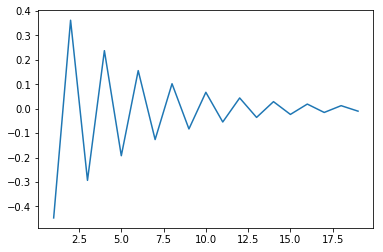

In [44]:
def approxi(x, n):
    l = []
    for i in range(n):
        err = cal_diff(x, i)
        l.append(err)

    import matplotlib.pyplot as plt

    x = np.linspace(1,n-1,n-1)
    plt.plot(x,l[1::])
approxi(0.9, 20)

In [20]:
x = np.linspace(0,19,20)
print(len(x))
x

20


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19.])

In [30]:
np.exp(np.log(0.9) / -200. * -1000)

0.5904900000000001

In [24]:
from torchvision import transforms
a = torch.randn(64,3,28,28)
torch.mean(a,dim=1,keepdim=True).shape

torch.Size([64, 1, 28, 28])

In [45]:
F = torch.nn.functional
nb_channels = 1
h, w = 5, 5
x = torch.randn(1, nb_channels, h, w)
weights = torch.tensor([[0., 0.],
                        [-1., 1.]]
                        )
weights = weights.view(1, 1, 2, 2).repeat(1, nb_channels, 1, 1)

output = F.conv2d(x, weights, stride=1, padding=1) # stride, padding

In [53]:
torch.transpose(weights, 0, 1)

tensor([[[[ 0.,  0.],
          [-1.,  1.]]]])

In [46]:
print(x)
print(output)

tensor([[[[-0.5123,  0.2065,  1.1892, -0.6226,  0.6498],
          [-1.2444,  0.3558,  0.0946, -0.9940,  0.8882],
          [-2.4126,  0.9574, -0.8669, -1.2227,  2.1369],
          [-0.0565, -0.5411,  0.2483, -0.3679,  0.5140],
          [ 0.2241, -1.6647,  0.4594, -1.3625, -1.2554]]]])
tensor([[[[-0.5123,  0.7188,  0.9827, -1.8118,  1.2724, -0.6498],
          [-1.2444,  1.6003, -0.2612, -1.0887,  1.8823, -0.8882],
          [-2.4126,  3.3700, -1.8243, -0.3558,  3.3596, -2.1369],
          [-0.0565, -0.4847,  0.7894, -0.6162,  0.8819, -0.5140],
          [ 0.2241, -1.8888,  2.1241, -1.8219,  0.1071,  1.2554],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]]]])


In [51]:
import tensorflow as tf
k = tf.reshape(tf.constant([[0, 0], [-1, 1]], tf.float32), [2, 2, 1, 1])
k = tf.transpose(k, [1, 0, 2, 3])
with tf.Session() as sess:
    p = sess.run(k)
    
# tensorflow conv : HWC
p[0]

array([[[ 0.]],

       [[-1.]]], dtype=float32)

In [62]:
# 先broadcast再element wise mul

In [61]:
a = torch.randn(1,4)
b = torch.randn(4,1)
print(a)
print(b)
a * b # a.mul(b) 和这个一样

tensor([[-0.6463, -0.0958,  1.3170, -0.3998]])
tensor([[ 0.4286],
        [ 0.4979],
        [-0.3295],
        [-2.1630]])


tensor([[-0.2770, -0.0411,  0.5645, -0.1714],
        [-0.3218, -0.0477,  0.6557, -0.1991],
        [ 0.2129,  0.0316, -0.4339,  0.1317],
        [ 1.3980,  0.2073, -2.8487,  0.8648]])

In [64]:
a = torch.randn(4,1)
b = torch.randn(1,4)
print(a)
print(b)
a * b

tensor([[-0.3577],
        [ 0.6821],
        [-0.5958],
        [-2.2468]])
tensor([[-0.4007, -1.8749,  0.1591,  1.6440]])


tensor([[ 0.1433,  0.6706, -0.0569, -0.5880],
        [-0.2733, -1.2789,  0.1085,  1.1214],
        [ 0.2387,  1.1170, -0.0948, -0.9794],
        [ 0.9002,  4.2125, -0.3574, -3.6936]])

In [106]:
import torch

x = np.linspace(-5, 5, 1000)
idx = np.random.randint(1000, size=100)
x = x[idx]
y = np.sin(x)

def net():
    layer = []
    layer.append(torch.nn.Linear(in_features=1, out_features=40))
    layer.append(torch.nn.ReLU(True))
    layer.append(torch.nn.Linear(in_features=40, out_features=40))
    layer.append(torch.nn.ReLU(True))
    layer.append(torch.nn.Linear(in_features=40, out_features=1))
    layer.append(torch.nn.Tanh())
    
    model = torch.nn.Sequential(*layer)
    
    return model

model = net()

param = model.parameters()
opt = torch.optim.Adam(params=param)

x = torch.tensor(x).float()
x = torch.unsqueeze(x, 1)
y = torch.tensor(y).float()
y = torch.unsqueeze(y, 1)
for i in range(1000):
    y_hat = model(x)
    loss = torch.mean((y_hat - y) **2)
    loss.backward()
    opt.step()
    opt.zero_grad()
    

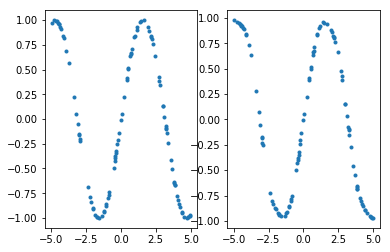

In [107]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(x.numpy(), y.numpy(), '.')
plt.subplot(1,2,2)
plt.plot(x.numpy(), y_hat.detach().numpy(), '.')

In [116]:
# Tasks: 0,pi random cut from sin wave
def task_gen(num):
    start_id = np.random.rand(1) * 2 * np.pi
    end_id = start_id + np.pi
    data_list = []
    for _ in range(num):
        points = np.linspace(start_id, end_id, 1000)
        idx = np.random.randint(1000, size=100)
        x = points[idx]
        y = np.sin(x)
        data = (x,y)
        data_list.append(data)
        
    return data_list

In [120]:
l = []
l == []

True

In [131]:
def flat_list(tensor_list):
    if len(tensor_list) == 2:
        return torch.cat((tensor_list[0], tensor_list[1]))
    else:
        return torch.cat((tensor_list[0], flat_list(tensor_list[1:])))

a = [torch.tensor([1]), torch.tensor([2])]
flat_list(a)

tensor([1, 2])

In [183]:
# test on 5 tasks
tasks = task_gen(5)

def net():
    layer = []
    layer.append(torch.nn.Linear(in_features=1, out_features=40))
    layer.append(torch.nn.ReLU(True))
    layer.append(torch.nn.Linear(in_features=40, out_features=40))
    layer.append(torch.nn.ReLU(True))
    layer.append(torch.nn.Linear(in_features=40, out_features=1))
    layer.append(torch.nn.Tanh())
    
    model = torch.nn.Sequential(*layer)
    
    return model

model = net()

param = model.parameters()
opt = torch.optim.Adam(params=param)

for i in range(1000):
    left_x_list = []
    left_y_list = []
    for task in tasks:
        x,y = task
        x = torch.unsqueeze(torch.tensor(x),1).float()
        y = torch.unsqueeze(torch.tensor(y),1).float()
        y_hat = model(x)
        loss = torch.mean((y_hat - y) **2)
        loss.backward()
        opt.step()
        opt.zero_grad()
        
        left_idx = np.random.randint(100, size=10)
        left_x_list.append(x[left_idx])
        left_y_list.append(y[left_idx])
        
    x = flat_list(left_x_list)
    y = flat_list(left_y_list)
    
    y_hat = model(x)
    loss = torch.mean((y_hat - y) **2)
    loss.backward()
    opt.step()
    opt.zero_grad()

In [158]:
def nparray2tensor(array):
    return torch.unsqueeze(torch.tensor(array).float(), 1)

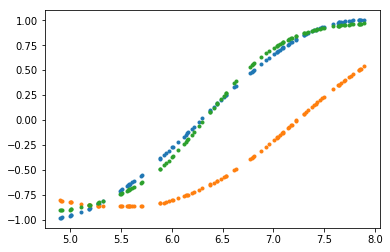

In [189]:
test_task = task_gen(1)[0]
test_x, test_y = test_task
plt.plot(test_x, test_y, '.')

y_hat = model(nparray2tensor(test_x))
plt.plot(test_x, y_hat.detach().numpy(), '.')

# after few shot training:
idx_take = np.random.randint(100, size=10)
for i in range(100):
    y_hat = model(nparray2tensor(test_x)[idx_take])
    loss = torch.mean((y_hat - nparray2tensor(test_y)[idx_take]) **2)
    loss.backward()
    opt.step()
    opt.zero_grad()
    
y_hat = model(nparray2tensor(test_x))
plt.plot(test_x, y_hat.detach().numpy(), '.')
plt.show()
# has some effects but not convincing enough

In [17]:
import matplotlib.pyplot as plt

In [27]:
get_lin(0.8, 1.5, 1000, 3)

[1.9531249999999996,
 1.9480018918225241,
 1.942896685421859,
 1.9378093026731034,
 1.9327396658601317,
 1.9276876976730997,
 1.922653321205972,
 1.9176364599540596,
 1.912637037811582,
 1.90765497906924,
 1.9026902084118098,
 1.897742650915749,
 1.8928122320468264,
 1.8878988776577612,
 1.8830025139858833,
 1.8781230676508045,
 1.8732604656521141,
 1.8684146353670783,
 1.86358550454837,
 1.8587730013218022,
 1.8539770541840832,
 1.8491975920005845,
 1.8444345440031265,
 1.839687839787777,
 1.8349574093126655,
 1.8302431828958134,
 1.8255450912129796,
 1.820863065295517,
 1.8161970365282492,
 1.8115469366473567,
 1.8069126977382797,
 1.8022942522336356,
 1.7976915329111522,
 1.7931044728916097,
 1.7885330056368016,
 1.7839770649475086,
 1.7794365849614817,
 1.7749115001514486,
 1.7704017453231229,
 1.7659072556132347,
 1.761427966487569,
 1.7569638137390209,
 1.7525147334856648,
 1.7480806621688298,
 1.743661536551198,
 1.7392572937149078,
 1.734867871059674,
 1.730493206300917,
 1.726

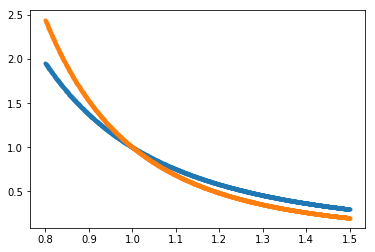

In [26]:
def curv(x, alpha):
    return [1. / (x_) ** alpha for x_ in x]

def get_linspace(x,y,z):
    return np.linspace(x,y,z)

def compose(f,g):
    return lambda x,y,z, alpha: f(g(x,y,z), alpha)

get_lin = compose(curv, get_linspace)

lin = np.linspace(0.8, 1.5, 1000)
y = curv(lin, alpha=3)
lin = np.linspace(0.8, 1.5, 1000)
y_ = curv(lin, alpha=4)
plt.plot(lin, y, '.')
plt.plot(lin, y_, '.')

In [237]:
# 思路有问题。 导数的导数而不是简单另取样本计算

0.001

In [15]:
# function composition
def compose2(f,g):
    return lambda x: f(g(x))

def double(x):
    return x*2

def increase(x):
    return x+1

def decrease(x):
    return x-1

new_fn = compose2(compose2(double , increase), decrease) # 合并成一个function
new_fn(3)

6

In [1]:
from gridworld import GridWorld

In [28]:
grid = [['0', '-1', '-1', '-1'],
        ['-1', '-1', '-1', '-1'],
        ['-1', '-1', '-1', '-1'],
        ['-1', '-1', '-1', '0']]
env = GridWorld(grid, {(0, 0), (3, 3)}, 1) # 数值为从该处任意action离开获得的R

In [40]:
env.reset((0,1))
env.step(1)
env.step(0)

((0, 0), 0, (0, 0), 0.0, True)

In [78]:
env.reset((0,1))

In [92]:
class world(GridWorld):
    def __init__(self, grid, ter, prob):
        super().__init__(grid, ter, prob)
        
    def set_agent(self):
        """ create a new agent and assign it to current world """
        self.agent = agent(self)
        return self.agent
        
        
class agent(object):
    def __init__(self, world):
        self.world = world
        
    def apply_policy(self, policy):
        """ set a new policy for this agent """
        self.policy = policy
    
    def _step(self, action):
        self.current_state, self.action, self.next_state, self.reward, self.is_done = self.world.step(action)
        self.trajectory.append((self.current_state, self.reward))
        
    def start_exp_one_episode(self):
        self.trajectory = []
        self.world.reset((0,1))
        self._step(0)
        while(not self.is_done):
            action = np.random.randint(0,4)
            self._step(action)
            
        return self.trajectory
            
        
w = world(grid, {(0, 0), (3, 3)}, 1)       
w.reset((0,1))
a = w.set_agent()

trajectory = a.start_exp_one_episode()
print(trajectory)

[((0, 1), -1.0), ((0, 2), -1.0), ((1, 2), -1.0), ((1, 1), -1.0), ((1, 0), -1.0), ((1, 1), -1.0), ((1, 0), -1.0), ((1, 0), -1.0), ((1, 0), -1.0), ((1, 0), -1.0), ((0, 0), 0.0)]


In [81]:
# 从trajectory中找first visited然后记录其下一个状态
def get_first_visited_states_from_traj(trajectory):

    first_visited = {}
    for ((x,y), R) in trajectory:
        if (x,y) not in first_visited.keys():
            first_visited[(x,y)] = R
            
    return first_visited

In [82]:
def get_next_state_from_first_visited(first_visited):

    mark_states = {}
    for s in first_visited.keys():
        mark_states[s] = False

    next_states = []
    for s in first_visited.keys():
        for i in range(len(trajectory)):
            if not mark_states[s]:
                if i == len(trajectory)-1: next_states.append(s); break
                if s == trajectory[i][0]:
                    next_states.append(trajectory[i+1][0])
                    mark_states[s] = True

    return next_states

In [96]:
def get_v_updated(v_k, first_visited, next_states):
    v_k_p1 = {}
    v_k_p1 = v_k.copy()
    states_iter = iter(first_visited)
    next_states_iter = iter(next_states)
    while True:
        try:
            state = next(states_iter)
            next_state = next(next_states_iter)
        except:
            break
        R = first_visited[state]

        v_k_p1[state] = R + 0.25 * v_k[next_state]

    return v_k_p1

In [107]:
# build the env and set agent
w = world(grid, {(0, 0), (3, 3)}, 1)       
w.reset((0,1))
ag = w.set_agent()

# define value of policy
v_k = {} # pair of state and value of state
for i in range(4):
    for j in range(4):
        v_k[(i,j)] = 0.0

def one_iter(v_k, agent):
    trajectory = agent.start_exp_one_episode()
    # now turn pieces togather
    def compose(f,g,h):
        return lambda x,y: h(x, f(y), g(f(y)))

    func = compose(get_first_visited_states_from_traj, get_next_state_from_first_visited, get_v_updated)
    c = func(v_k, trajectory)
    
    return c

for i in range(10):
    v_k = one_iter(v_k, ag)
    
print(v_k) # 在该policy下每个state的value

{(0, 0): 0.0, (0, 1): -1.328125, (0, 2): -1.3125, (0, 3): -1.3125, (1, 0): -1.25, (1, 1): -1.3125, (1, 2): -1.328125, (1, 3): -1.328125, (2, 0): -1.0, (2, 1): -1.328125, (2, 2): -1.3125, (2, 3): -1.3125, (3, 0): -1.0, (3, 1): -1.25, (3, 2): -1.0, (3, 3): 0.0}


V_s 的跟新与上一次V_s无关, 仅与上一次v_s下一step以及这一次这一step后的reward 相关

In [180]:
def to_action(state):
    s = sum(state)
    if s == 0:
        a = 0
    elif s == 1 or s == 2:
        a = 1
    elif s == 3 or s == 4:
        a = 2
    else: a = 3
    return a

l = [to_action(t) for t,_ in trajectory]
l # a list of actions given trajectory

[2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3]

In [ ]:
# 用value并用argmax取action还是直接跟新policy
# update value
Seq_of_R = []
states = []
G_for_each_state = []

V_for_each_state = updare_func(G_for_each_state)

# update policy
action = argmax_a(V_for_each_state) # a list of updated actions

In [ ]:
# gym grid world (done)
# optmal policy
# iteratively update R

In [346]:
def get_minor(m, x ,y):
    n = []
    for row in m: # 如果n = m.copy(), 则n内的数组还是指向m内，修改n内层会修改m内层
        n.append(row.copy())
    n.pop(x)
    for row in n:
        row.pop(y)
    return n
        
a = [[1,2],[3,4]]
b= [[1,2,3],[4,5,6],[2,4,3]]

def get_det(m): # get nxn determinant
    c = 1
    t = 0
    col = len(m[0])
    if len(m[0]) == 1:
        return m[0][0]
    for a in range(col):
        t += m[0][a] * c * get_det(get_minor(m, 0, a))
        c = -c
        
    return t
print(get_det(a))
print(get_det(b))

-2
9


In [533]:
c = [[2,-1],[2,2]]
get_det(c)

6

In [131]:
def sum_two(a: int, b: int)-> (int,float): # 仅仅是type hint而没有做强行限制
    return a+b

sum_two(3.0,2)

def multiple_return(a,b):
    return a,b

t = multiple_return(3,2)
type(t)
# 当python func 返回值不只一个，且不同值用逗号分隔时，实际返回的是一个tuple，其中元素即使各个返回值

tuple

In [108]:
# specify grid and policy used by expert

# the grid is a 5x5 gridworld with termination state at (0,4)

grid = [['-1', '-1', '-1','-1', '0'],
        ['-1', '-1', '-1','-1', '-1'],
        ['-1', '-1', '-1','-1', '-1'],
        ['-1', '-1', '-1','-1', '-1']]
env = GridWorld(grid, (0, 4), 1) # 数值为从该处任意action离开获得的R

In [115]:
import numpy as np

# np.array 是同一个object，
A = np.array([[0.33, 0.67],[0.65, 0.35]])

B = A

A[0][0] = 5
A,B

(array([[5.  , 0.67],
        [0.65, 0.35]]), array([[5.  , 0.67],
        [0.65, 0.35]]))

In [127]:
A = np.array([[0.33, 0.67],[0.75, 0.25]])
T = np.array([[0.33, 0.67],[0.75, 0.25]])
for i in range(3):
    T = np.matmul(T,A)
    
T

array([[0.54285096, 0.45714904],
       [0.511734  , 0.488266  ]])

In [ ]:
# 可以尝试写cython: 将编程作为一整整体

In [ ]:
# solver for linear programming; opt under constrains
# compute value